In [2]:
##########################Practical###################################

#Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results.

from scipy import stats
import numpy as np

# Population parameters
population_mean = 100
population_std = 15

# Sample data
sample = np.array([102, 98, 105, 100, 110, 99, 101, 97, 103, 104])
sample_size = len(sample)
sample_mean = np.mean(sample)

# Z-test calculation
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # two-tailed

print(f"Sample Mean = {sample_mean:.2f}")
print(f"Z-score = {z_score:.2f}")
print(f"P-value = {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference from population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")


Sample Mean = 101.90
Z-score = 0.40
P-value = 0.6887
Fail to reject the null hypothesis: No significant difference.


In [4]:
# Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python.

np.random.seed(0)
population_mean = 50
population_std = 10
sample = np.random.normal(loc=52, scale=10, size=40)

sample_mean = np.mean(sample)
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(len(sample)))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print(f"Simulated Sample Mean: {sample_mean:.2f}")
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")


Simulated Sample Mean: 55.13
Z-score: 3.24
P-value: 0.0012


In [6]:
#3.Implement a one-sample Z-test using Python to compare the sample mean with the population mean.

def one_sample_z_test(sample, population_mean, population_std):
    n = len(sample)
    sample_mean = np.mean(sample)
    z = (sample_mean - population_mean) / (population_std / np.sqrt(n))
    p = 2 * (1 - stats.norm.cdf(abs(z)))
    return z, p

sample_data = np.random.normal(102, 12, 30)
z, p = one_sample_z_test(sample_data, 100, 15)
print(f"Z = {z:.2f}, P = {p:.4f}")


Z = -1.27, P = 0.2028


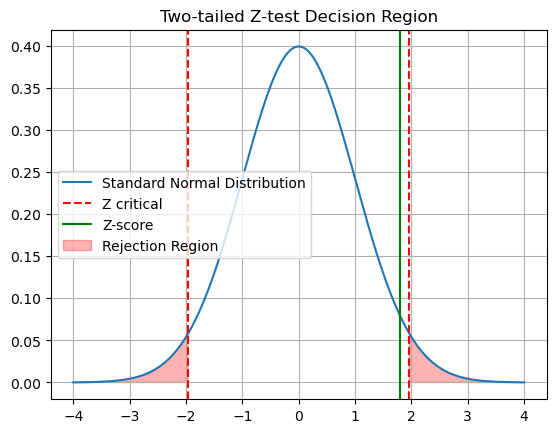

In [8]:
#4.Perform a two-tailed Z-test using Python and visualize the decision region on a plot.

import matplotlib.pyplot as plt

z_score = 1.8
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha/2)

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)

plt.plot(x, y, label='Standard Normal Distribution')
plt.axvline(z_critical, color='r', linestyle='--', label='Z critical')
plt.axvline(-z_critical, color='r', linestyle='--')
plt.axvline(z_score, color='g', label='Z-score')
plt.fill_between(x, y, where=(x > z_critical) | (x < -z_critical), color='red', alpha=0.3, label='Rejection Region')
plt.title("Two-tailed Z-test Decision Region")
plt.legend()
plt.grid(True)
plt.show()


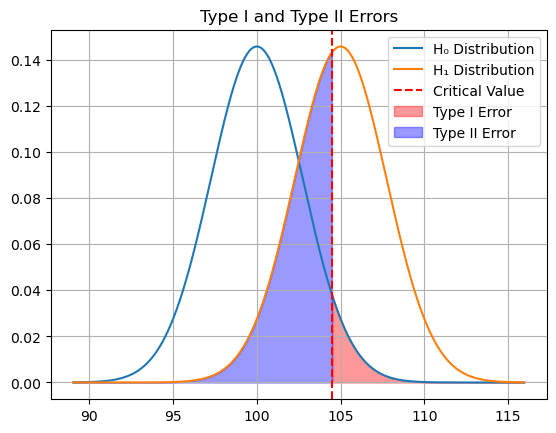

In [10]:
#5. Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing.

def plot_type1_type2(mu0, mu1, sigma, n, alpha):
    se = sigma / np.sqrt(n)
    x = np.linspace(mu0 - 4*se, mu1 + 4*se, 1000)

    z_alpha = stats.norm.ppf(1 - alpha)
    critical_value = mu0 + z_alpha * se

    plt.plot(x, stats.norm.pdf(x, mu0, se), label='H₀ Distribution')
    plt.plot(x, stats.norm.pdf(x, mu1, se), label='H₁ Distribution')
    plt.axvline(critical_value, color='r', linestyle='--', label='Critical Value')

    plt.fill_between(x, 0, stats.norm.pdf(x, mu0, se), where=(x > critical_value), color='red', alpha=0.4, label='Type I Error')
    plt.fill_between(x, 0, stats.norm.pdf(x, mu1, se), where=(x < critical_value), color='blue', alpha=0.4, label='Type II Error')

    plt.title("Type I and Type II Errors")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_type1_type2(mu0=100, mu1=105, sigma=15, n=30, alpha=0.05)



In [12]:
#6. Write a Python program to perform an independent T-test and interpret the results.

from scipy.stats import ttest_ind

group1 = np.random.normal(100, 10, 30)
group2 = np.random.normal(105, 10, 30)

t_stat, p_val = ttest_ind(group1, group2)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Significant difference between groups.")
else:
    print("No significant difference between groups.")


T-statistic: -2.61, P-value: 0.0115
Significant difference between groups.


Paired T-test: t = -2.62, p = 0.0170


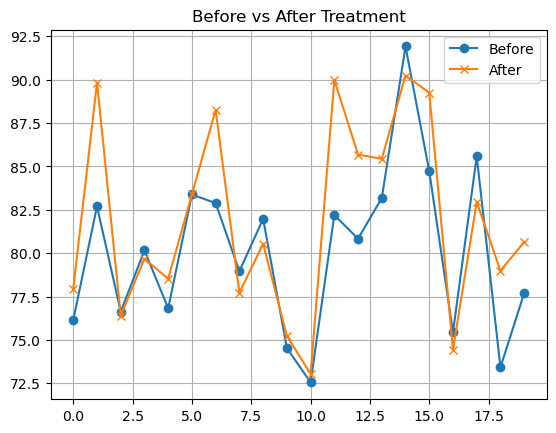

In [14]:
#7. Perform a paired sample T-test using Python and visualize the comparison results.


from scipy.stats import ttest_rel

before = np.random.normal(80, 5, 20)
after = before + np.random.normal(2, 3, 20)

t_stat, p_val = ttest_rel(before, after)
print(f"Paired T-test: t = {t_stat:.2f}, p = {p_val:.4f}")

# Visualization
plt.plot(before, label="Before", marker='o')
plt.plot(after, label="After", marker='x')
plt.title("Before vs After Treatment")
plt.legend()
plt.grid(True)
plt.show()



In [16]:
#8. Simulate data and perform both Z-test and T-test, then compare the results using Python.


sample = np.random.normal(102, 10, 20)
population_mean = 100
population_std = 10

# Z-test
z = (np.mean(sample) - population_mean) / (population_std / np.sqrt(len(sample)))
p_z = 2 * (1 - stats.norm.cdf(abs(z)))

# T-test
t, p_t = stats.ttest_1samp(sample, population_mean)

print(f"Z-test: Z = {z:.2f}, P = {p_z:.4f}")
print(f"T-test: t = {t:.2f}, P = {p_t:.4f}")


Z-test: Z = -0.59, P = 0.5520
T-test: t = -0.62, P = 0.5397


In [18]:
#9. Write a Python function to calculate the confidence interval for a sample mean and explain its significance.


def confidence_interval(sample, confidence=0.95):
    n = len(sample)
    mean = np.mean(sample)
    std_err = stats.sem(sample)
    margin = stats.t.ppf((1 + confidence) / 2, n - 1) * std_err
    return mean - margin, mean + margin

sample = np.random.normal(100, 12, 25)
ci = confidence_interval(sample)
print(f"95% Confidence Interval: {ci[0]:.2f} to {ci[1]:.2f}")


95% Confidence Interval: 97.25 to 106.02


In [20]:
#10. Write a Python program to calculate the margin of error for a given confidence level using sample data.

import numpy as np
from scipy.stats import norm

def margin_of_error(sample, confidence=0.95):
    n = len(sample)
    std_err = np.std(sample, ddof=1) / np.sqrt(n)
    z = norm.ppf((1 + confidence) / 2)
    return z * std_err

# Example
data = np.random.normal(100, 15, 30)
moe = margin_of_error(data)
print(f"Margin of Error (95%): ±{moe:.2f}")


Margin of Error (95%): ±4.64


In [22]:
#11. Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process.

def bayes_theorem(prior_A, prob_B_given_A, prob_B):
    return (prob_B_given_A * prior_A) / prob_B

# Example
prior_disease = 0.01         # 1% chance of disease
test_positive_given_disease = 0.95
test_positive = 0.05

posterior = bayes_theorem(prior_disease, test_positive_given_disease, test_positive)
print(f"Probability of having disease given a positive test: {posterior:.4f}")


Probability of having disease given a positive test: 0.1900


In [24]:
#12. Perform a Chi-square test for independence between two categorical variables in Python.

import pandas as pd
from scipy.stats import chi2_contingency

# Sample data
data = [[30, 10],
        [20, 40]]
table = pd.DataFrame(data, columns=['Pass', 'Fail'], index=['Male', 'Female'])

chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi-square Statistic = {chi2:.2f}")
print(f"P-value = {p:.4f}")


Chi-square Statistic = 15.04
P-value = 0.0001


In [26]:
#13. Write a Python program to calculate the expected frequencies for a Chi-square test based on observed
# data.

observed = np.array([[10, 20], [20, 40]])
chi2, p, dof, expected = chi2_contingency(observed)

print("Observed Frequencies:\n", observed)
print("Expected Frequencies:\n", expected)


Observed Frequencies:
 [[10 20]
 [20 40]]
Expected Frequencies:
 [[10. 20.]
 [20. 40.]]


In [32]:
# 14. Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution.

import numpy as np
from scipy.stats import chisquare

# Example: Observed frequencies (e.g., dice rolls)
observed = np.array([18, 22, 20, 19, 21, 20])  # Dice rolled 120 times

# Expected frequencies (uniform: all categories equally likely)
expected = np.full_like(observed, fill_value=np.sum(observed) / len(observed))

# Perform Chi-square goodness-of-fit test
chi2_stat, p_val = chisquare(f_obs=observed, f_exp=expected)

print("Observed Frequencies:", observed)
print("Expected Frequencies:", expected)
print(f"Chi-square Statistic = {chi2_stat:.4f}")
print(f"P-value = {p_val:.4f}")

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: Observed data does not fit expected distribution.")
else:
    print("Fail to reject the null hypothesis: Observed data fits the expected distribution.")


Observed Frequencies: [18 22 20 19 21 20]
Expected Frequencies: [20 20 20 20 20 20]
Chi-square Statistic = 0.5000
P-value = 0.9921
Fail to reject the null hypothesis: Observed data fits the expected distribution.


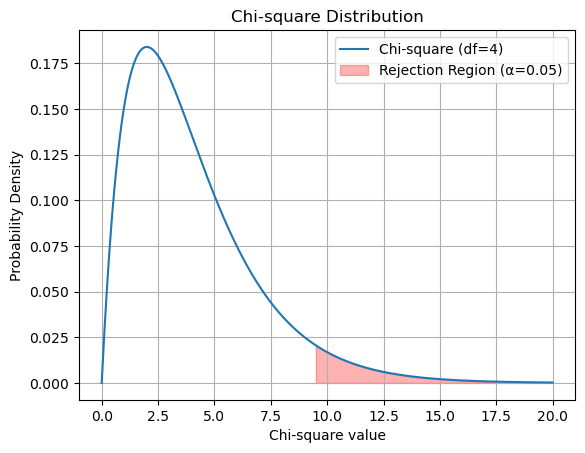

In [34]:
#15. Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics.

import matplotlib.pyplot as plt
from scipy.stats import chi2

df = 4
x = np.linspace(0, 20, 500)
y = chi2.pdf(x, df)

plt.plot(x, y, label=f"Chi-square (df={df})")
plt.fill_between(x, y, where=(x > chi2.ppf(0.95, df)), color='red', alpha=0.3, label="Rejection Region (α=0.05)")
plt.title("Chi-square Distribution")
plt.xlabel("Chi-square value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


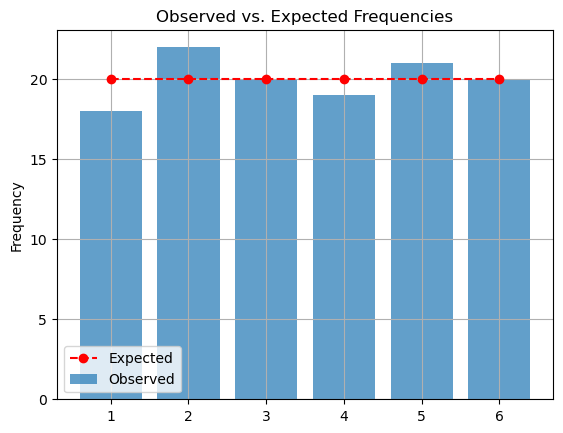

In [36]:
import matplotlib.pyplot as plt

categories = ['1', '2', '3', '4', '5', '6']

plt.bar(categories, observed, alpha=0.7, label='Observed')
plt.plot(categories, expected, color='red', linestyle='--', label='Expected', marker='o')
plt.title('Observed vs. Expected Frequencies')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
#16.Implement an F-test using Python to compare the variances of two random samples.

import numpy as np
from scipy.stats import f

# Simulate two independent samples
np.random.seed(0)
sample1 = np.random.normal(loc=50, scale=10, size=30)  # Std dev = 10
sample2 = np.random.normal(loc=52, scale=15, size=30)  # Std dev = 15

# Sample variances
var1 = np.var(sample1, ddof=1)
var2 = np.var(sample2, ddof=1)

# F-statistic (larger variance in numerator)
F = var1 / var2 if var1 > var2 else var2 / var1

# Degrees of freedom
df1 = len(sample1) - 1
df2 = len(sample2) - 1

# P-value (two-tailed test)
p_value = 2 * (1 - f.cdf(F, df1, df2))
if p_value > 1:
    p_value = 2 - p_value  # Symmetric tail correction

# Print results
print(f"Variance 1 = {var1:.2f}")
print(f"Variance 2 = {var2:.2f}")
print(f"F-statistic = {F:.4f}")
print(f"P-value = {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Variances are significantly different.")
else:
    print("Fail to reject H₀: No significant difference in variances.")


Variance 1 = 121.07
Variance 2 = 188.06
F-statistic = 1.5533
P-value = 0.2416
Fail to reject H₀: No significant difference in variances.


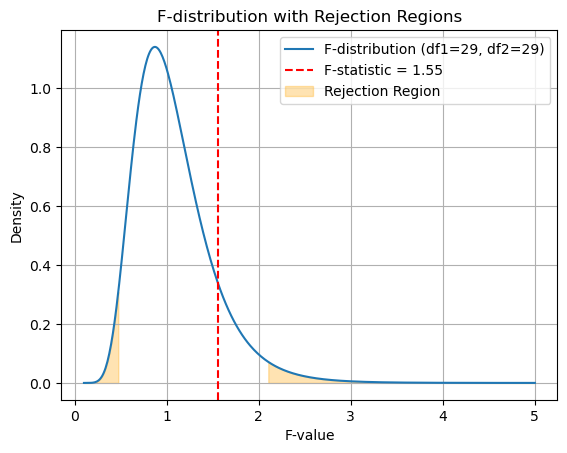

In [40]:
import matplotlib.pyplot as plt

x = np.linspace(0.1, 5, 500)
y = f.pdf(x, df1, df2)

plt.plot(x, y, label=f"F-distribution (df1={df1}, df2={df2})")
plt.axvline(F, color='red', linestyle='--', label=f'F-statistic = {F:.2f}')
plt.fill_between(x, y, where=(x > f.ppf(1 - alpha/2, df1, df2)), color='orange', alpha=0.3, label='Rejection Region')
plt.fill_between(x, y, where=(x < f.ppf(alpha/2, df1, df2)), color='orange', alpha=0.3)
plt.title("F-distribution with Rejection Regions")
plt.xlabel("F-value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


In [42]:
#17. Write a Python program to perform an ANOVA test to compare means between multiple groups and interpret the results.

import numpy as np
from scipy.stats import f_oneway

# Simulated data for 3 groups (e.g., exam scores of 3 different teaching methods)
group_A = np.random.normal(loc=75, scale=5, size=30)
group_B = np.random.normal(loc=78, scale=5, size=30)
group_C = np.random.normal(loc=72, scale=5, size=30)

# Perform one-way ANOVA
f_stat, p_val = f_oneway(group_A, group_B, group_C)

# Results
print("ANOVA Results:")
print(f"F-statistic = {f_stat:.4f}")
print(f"P-value     = {p_val:.4f}")

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Reject H₀: At least one group mean is significantly different.")
else:
    print("Fail to reject H₀: No significant difference in group means.")


ANOVA Results:
F-statistic = 22.7385
P-value     = 0.0000
Reject H₀: At least one group mean is significantly different.


/var/folders/7l/5x91jggs2tzgvdjl1xm7m0yr0000gn/T/ipykernel_83083/210548075.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


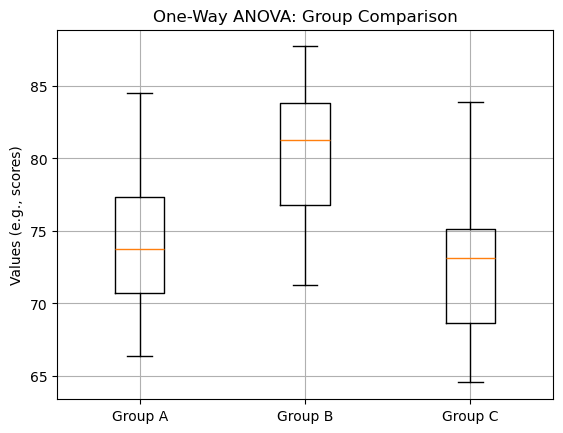

In [44]:
import matplotlib.pyplot as plt

data = [group_A, group_B, group_C]
labels = ['Group A', 'Group B', 'Group C']

plt.boxplot(data, labels=labels)
plt.title('One-Way ANOVA: Group Comparison')
plt.ylabel('Values (e.g., scores)')
plt.grid(True)
plt.show()


=== One-Way ANOVA Results ===
F-statistic : 40.9756
P-value     : 0.0000
🔍 Result: Reject the null hypothesis. At least one group mean is significantly different.


/var/folders/7l/5x91jggs2tzgvdjl1xm7m0yr0000gn/T/ipykernel_83083/1064420300.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_1, group_2, group_3], labels=['Method A', 'Method B', 'Method C'])


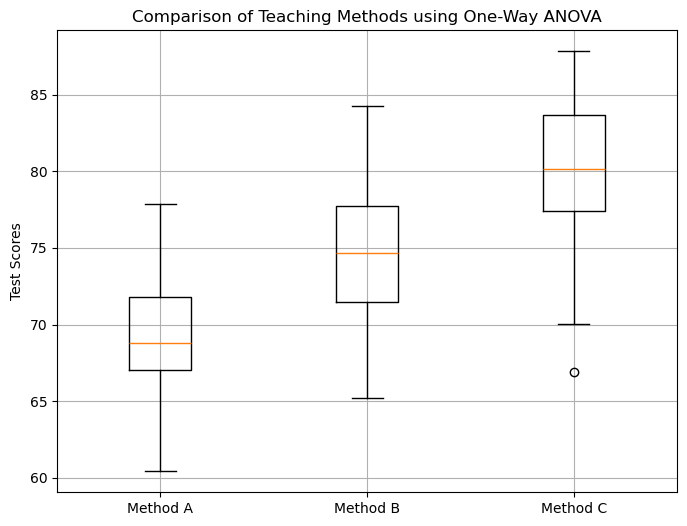

In [46]:
#18. Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Simulated data for three teaching methods
np.random.seed(42)
group_1 = np.random.normal(loc=70, scale=5, size=30)
group_2 = np.random.normal(loc=75, scale=5, size=30)
group_3 = np.random.normal(loc=80, scale=5, size=30)

# Perform one-way ANOVA
f_stat, p_value = f_oneway(group_1, group_2, group_3)

# Print the results
print("=== One-Way ANOVA Results ===")
print(f"F-statistic : {f_stat:.4f}")
print(f"P-value     : {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("🔍 Result: Reject the null hypothesis. At least one group mean is significantly different.")
else:
    print("✔️ Result: Fail to reject the null hypothesis. No significant difference in group means.")

# Visualize the group distributions using a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([group_1, group_2, group_3], labels=['Method A', 'Method B', 'Method C'])
plt.title("Comparison of Teaching Methods using One-Way ANOVA")
plt.ylabel("Test Scores")
plt.grid(True)
plt.show()


In [48]:
#19.  Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVAD.

import numpy as np
from scipy.stats import shapiro, levene

def check_anova_assumptions(*groups):
    print("=== Checking ANOVA Assumptions ===")
    
    # 1. Normality check (Shapiro-Wilk Test)
    print("\n👉 Normality Test (Shapiro-Wilk):")
    for i, group in enumerate(groups):
        stat, p = shapiro(group)
        print(f"Group {i+1}: W = {stat:.4f}, p = {p:.4f} {'✅ Normal' if p > 0.05 else '❌ Not Normal'}")
    
    # 2. Homogeneity of variances (Levene's Test)
    print("\n👉 Equal Variance Test (Levene’s Test):")
    stat, p = levene(*groups)
    print(f"Levene Statistic = {stat:.4f}, p = {p:.4f} {'✅ Equal variances' if p > 0.05 else '❌ Unequal variances'}")
    
    # 3. Independence is based on study design
    print("\n👉 Independence: This must be ensured during experiment design (not testable with code).")

# Example usage:
np.random.seed(42)
group1 = np.random.normal(70, 5, 30)
group2 = np.random.normal(75, 5, 30)
group3 = np.random.normal(80, 5, 30)

check_anova_assumptions(group1, group2, group3)


=== Checking ANOVA Assumptions ===

👉 Normality Test (Shapiro-Wilk):
Group 1: W = 0.9751, p = 0.6868 ✅ Normal
Group 2: W = 0.9837, p = 0.9130 ✅ Normal
Group 3: W = 0.9628, p = 0.3654 ✅ Normal

👉 Equal Variance Test (Levene’s Test):
Levene Statistic = 0.1480, p = 0.8627 ✅ Equal variances

👉 Independence: This must be ensured during experiment design (not testable with code).


In [50]:
#20. Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the
# results.
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated Data
np.random.seed(42)
data = {
    'Score': np.random.normal(loc=75, scale=5, size=80),
    'Method': ['A']*20 + ['B']*20 + ['A']*20 + ['B']*20,
    'Gender': ['Male']*40 + ['Female']*40
}
df = pd.DataFrame(data)

# Introduce variation based on groups (interaction)
df.loc[(df['Method'] == 'A') & (df['Gender'] == 'Female'), 'Score'] += 3
df.loc[(df['Method'] == 'B') & (df['Gender'] == 'Female'), 'Score'] -= 2

# Two-way ANOVA
model = ols('Score ~ C(Method) + C(Gender) + C(Method):C(Gender)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("=== Two-Way ANOVA Results ===")
print(anova_table)



=== Two-Way ANOVA Results ===
                          sum_sq    df         F    PR(>F)
C(Method)             151.080301   1.0  6.413115  0.013391
C(Gender)              41.932161   1.0  1.779953  0.186139
C(Method):C(Gender)   103.519241   1.0  4.394225  0.039389
Residual             1790.409520  76.0       NaN       NaN


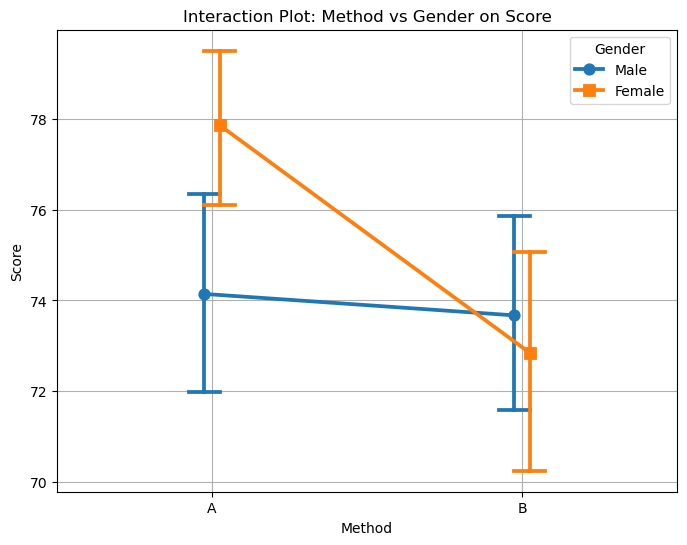

In [52]:
plt.figure(figsize=(8, 6))
sns.pointplot(data=df, x='Method', y='Score', hue='Gender', dodge=True, markers=['o', 's'], capsize=0.1)
plt.title("Interaction Plot: Method vs Gender on Score")
plt.grid(True)
plt.show()


In [ ]:
#21 Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing.

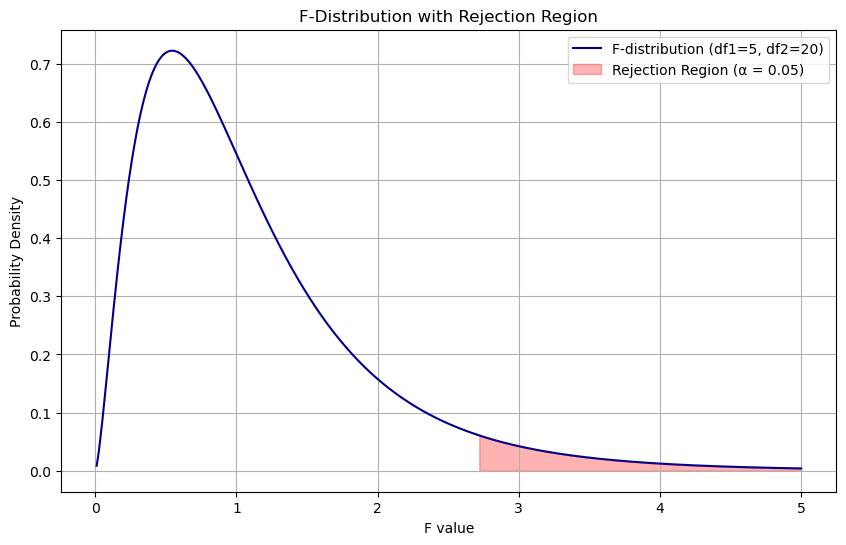

In [54]:
#import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Degrees of freedom
df1 = 5   # numerator degrees of freedom (between groups)
df2 = 20  # denominator degrees of freedom (within groups)

# Generate F-distribution values
x = np.linspace(0.01, 5, 500)
y = f.pdf(x, df1, df2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'F-distribution (df1={df1}, df2={df2})', color='darkblue')
plt.fill_between(x, y, where=(x > f.ppf(0.95, df1, df2)), color='red', alpha=0.3, label='Rejection Region (α = 0.05)')
plt.title('F-Distribution with Rejection Region')
plt.xlabel('F value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


=== One-Way ANOVA Test ===
F-statistic : 40.9756
P-value     : 0.0000
🔍 Result: Reject the null hypothesis → At least one group mean is significantly different.


/var/folders/7l/5x91jggs2tzgvdjl1xm7m0yr0000gn/T/ipykernel_83083/2857135724.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Score', data=df, palette='pastel')


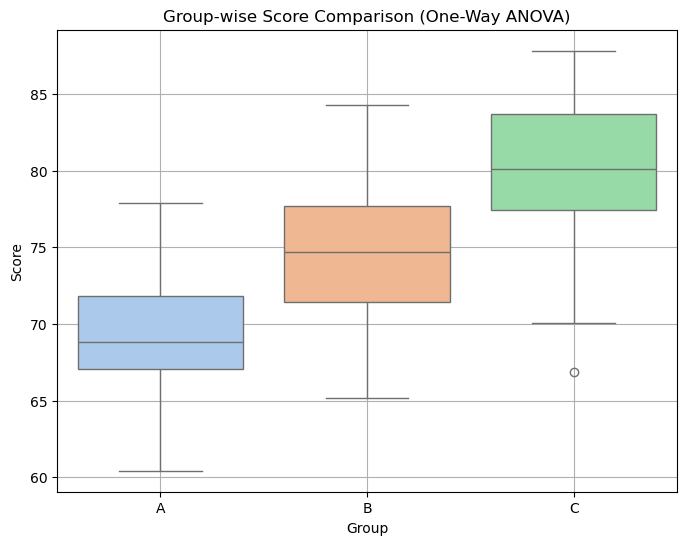

In [56]:
#22.Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Create sample data for 3 groups
np.random.seed(42)
group_A = np.random.normal(loc=70, scale=5, size=30)
group_B = np.random.normal(loc=75, scale=5, size=30)
group_C = np.random.normal(loc=80, scale=5, size=30)

# Combine into a DataFrame
df = pd.DataFrame({
    'Score': np.concatenate([group_A, group_B, group_C]),
    'Group': ['A']*30 + ['B']*30 + ['C']*30
})

# Perform one-way ANOVA
f_stat, p_value = f_oneway(group_A, group_B, group_C)

# Print results
print("=== One-Way ANOVA Test ===")
print(f"F-statistic : {f_stat:.4f}")
print(f"P-value     : {p_value:.4f}")

if p_value < 0.05:
    print("🔍 Result: Reject the null hypothesis → At least one group mean is significantly different.")
else:
    print("✔️ Result: Fail to reject the null hypothesis → No significant difference in group means.")

# Visualize using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Score', data=df, palette='pastel')
plt.title("Group-wise Score Comparison (One-Way ANOVA)")
plt.grid(True)
plt.show()


=== One-Sample T-Test ===
Sample Mean       : 72.75
Population Mean   : 70
T-statistic       : 2.0791
P-value           : 0.0429
🔍 Result: Reject the null hypothesis → Significant difference in means.


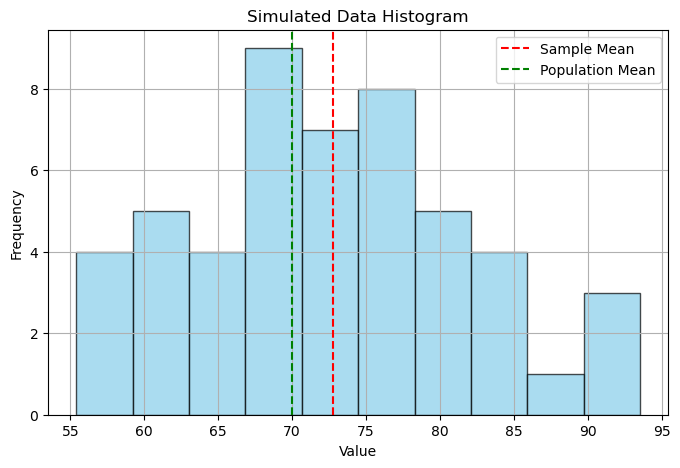

In [58]:
#23. Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means.


import numpy as np
from scipy.stats import norm, ttest_1samp
import matplotlib.pyplot as plt

# Step 1: Simulate data from normal distribution
np.random.seed(42)
sample = np.random.normal(loc=75, scale=10, size=50)  # μ=75, σ=10, n=50

# Step 2: Define known population mean
population_mean = 70

# Step 3: Hypothesis Testing - One Sample T-Test (since population std is unknown)
t_stat, p_value = ttest_1samp(sample, population_mean)

# Step 4: Print results
print("=== One-Sample T-Test ===")
print(f"Sample Mean       : {np.mean(sample):.2f}")
print(f"Population Mean   : {population_mean}")
print(f"T-statistic       : {t_stat:.4f}")
print(f"P-value           : {p_value:.4f}")

# Step 5: Interpretation
alpha = 0.05
if p_value < alpha:
    print("🔍 Result: Reject the null hypothesis → Significant difference in means.")
else:
    print("✔️ Result: Fail to reject the null → No significant difference in means.")

# Step 6: Visualize
plt.figure(figsize=(8, 5))
plt.hist(sample, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(sample), color='red', linestyle='--', label='Sample Mean')
plt.axvline(population_mean, color='green', linestyle='--', label='Population Mean')
plt.title('Simulated Data Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [60]:
#24. Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results.


import numpy as np
from scipy.stats import chi2

# Step 1: Simulate sample data from a normal distribution
np.random.seed(42)
sample_size = 30
population_variance = 25  # Known population variance (σ²)
sample_data = np.random.normal(loc=70, scale=np.sqrt(population_variance), size=sample_size)

# Step 2: Calculate sample variance
sample_variance = np.var(sample_data, ddof=1)

# Step 3: Calculate Chi-square statistic
chi_square_stat = (sample_size - 1) * sample_variance / population_variance

# Step 4: Set significance level (alpha = 0.05)
alpha = 0.05

# Step 5: Calculate critical value from Chi-square distribution
df = sample_size - 1  # Degrees of freedom = n - 1
chi_square_critical_low = chi2.ppf(alpha / 2, df)
chi_square_critical_high = chi2.ppf(1 - alpha / 2, df)

# Step 6: Print results
print("=== Chi-Square Test for Population Variance ===")
print(f"Sample Variance      : {sample_variance:.2f}")
print(f"Chi-Square Statistic : {chi_square_stat:.4f}")
print(f"Critical values      : {chi_square_critical_low:.4f}, {chi_square_critical_high:.4f}")

# Step 7: Interpret results
if chi_square_stat < chi_square_critical_low or chi_square_stat > chi_square_critical_high:
    print("🔍 Result: Reject the null hypothesis → The sample variance is significantly different from the population variance.")
else:
    print("✔️ Result: Fail to reject the null hypothesis → No significant difference in variances.")



=== Chi-Square Test for Population Variance ===
Sample Variance      : 20.25
Chi-Square Statistic : 23.4903
Critical values      : 16.0471, 45.7223
✔️ Result: Fail to reject the null hypothesis → No significant difference in variances.


=== Z-Test for Proportions ===
Z-statistic       : 2.0101
P-value           : 0.0444
🔍 Result: Reject the null hypothesis → The proportions are significantly different.


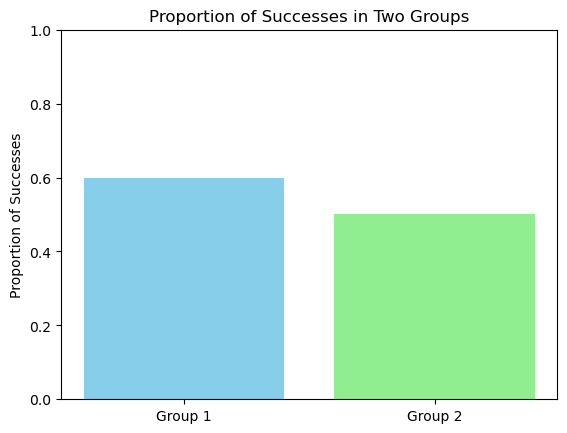

In [62]:
#25.Write a Python script to perform a Z-test for comparing proportions between two datasets or groups.


import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt

# Step 1: Simulate data for two groups (e.g., success vs. failure)
group_1_successes = 120
group_1_trials = 200

group_2_successes = 100
group_2_trials = 200

# Step 2: Perform Z-test for proportions
successes = np.array([group_1_successes, group_2_successes])
trials = np.array([group_1_trials, group_2_trials])

# Perform Z-test
z_stat, p_value = proportions_ztest(successes, trials)

# Step 3: Print the results
print("=== Z-Test for Proportions ===")
print(f"Z-statistic       : {z_stat:.4f}")
print(f"P-value           : {p_value:.4f}")

# Step 4: Interpretation
alpha = 0.05
if p_value < alpha:
    print("🔍 Result: Reject the null hypothesis → The proportions are significantly different.")
else:
    print("✔️ Result: Fail to reject the null hypothesis → No significant difference in proportions.")

# Step 5: Visualize the results using bar plots
labels = ['Group 1', 'Group 2']
proportions = [group_1_successes / group_1_trials, group_2_successes / group_2_trials]

plt.bar(labels, proportions, color=['skyblue', 'lightgreen'])
plt.ylabel('Proportion of Successes')
plt.title('Proportion of Successes in Two Groups')
plt.ylim(0, 1)
plt.show()


=== F-Test for Comparing Variances ===
Variance of Group 1 : 82.48
Variance of Group 2 : 363.79
F-statistic         : 4.4109
P-value             : 0.0000
🔍 Result: Reject the null hypothesis → The variances are significantly different.


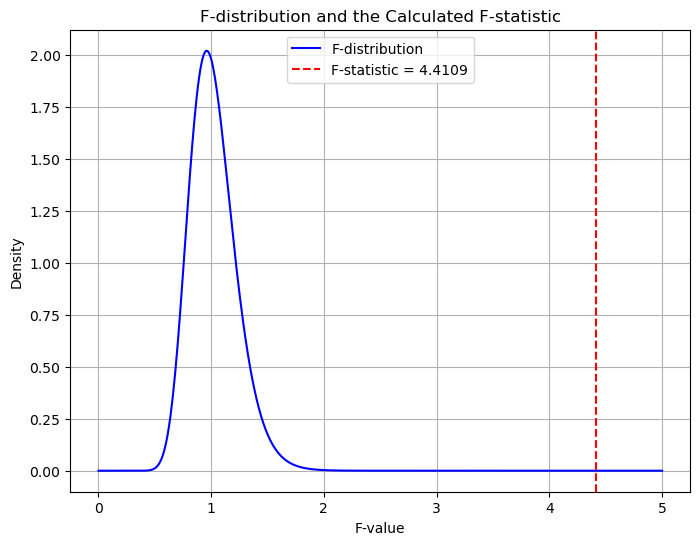

In [64]:
#26.  Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results.

import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt

# Step 1: Simulate two datasets with different variances
np.random.seed(42)
data_1 = np.random.normal(loc=50, scale=10, size=100)  # Group 1: Variance = 10^2
data_2 = np.random.normal(loc=50, scale=20, size=100)  # Group 2: Variance = 20^2

# Step 2: Calculate sample variances
var_1 = np.var(data_1, ddof=1)  # Sample variance of group 1
var_2 = np.var(data_2, ddof=1)  # Sample variance of group 2

# Step 3: Calculate the F-statistic (larger variance / smaller variance)
F_stat = var_1 / var_2 if var_1 > var_2 else var_2 / var_1

# Step 4: Degrees of freedom
dfn = len(data_1) - 1  # Degrees of freedom for the numerator (group 1)
dfd = len(data_2) - 1  # Degrees of freedom for the denominator (group 2)

# Step 5: Calculate the p-value using the F-distribution
p_value = 1 - f.cdf(F_stat, dfn, dfd)

# Step 6: Print results
print("=== F-Test for Comparing Variances ===")
print(f"Variance of Group 1 : {var_1:.2f}")
print(f"Variance of Group 2 : {var_2:.2f}")
print(f"F-statistic         : {F_stat:.4f}")
print(f"P-value             : {p_value:.4f}")

# Step 7: Interpretation
alpha = 0.05
if p_value < alpha:
    print("🔍 Result: Reject the null hypothesis → The variances are significantly different.")
else:
    print("✔️ Result: Fail to reject the null hypothesis → No significant difference in variances.")

# Step 8: Visualize the F-distribution
x = np.linspace(0, 5, 500)
y = f.pdf(x, dfn, dfd)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='F-distribution', color='b')
plt.axvline(x=F_stat, color='r', linestyle='--', label=f'F-statistic = {F_stat:.4f}')
plt.title('F-distribution and the Calculated F-statistic')
plt.xlabel('F-value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


=== Chi-square Goodness of Fit Test ===
Observed Frequencies  : [10, 12, 14, 15, 16, 13]
Expected Frequencies  : [13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334, 13.333333333333334]
Chi-square Statistic  : 1.7500
P-value               : 0.8825
✔️ Result: Fail to reject the null hypothesis → The observed data fits the expected distribution.


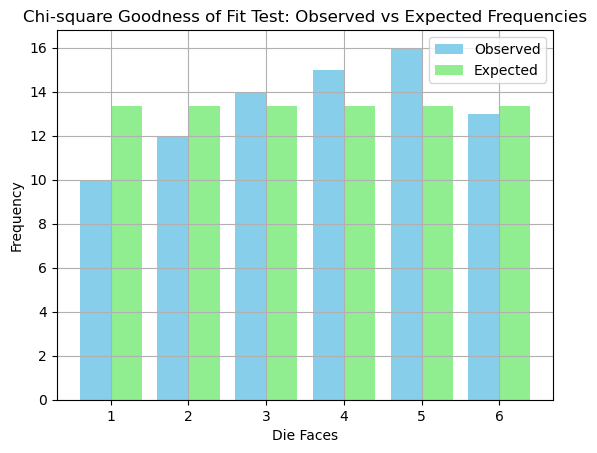

In [66]:
# 27.Perform a Chi-square test for goodness of fit with simulated data and analyze the results.

import numpy as np
from scipy.stats import chisquare
import matplotlib.pyplot as plt

# Step 1: Simulate observed data
# Assume we have data representing outcomes from a dice roll experiment
observed = [10, 12, 14, 15, 16, 13]  # Observed frequencies for each die face (1 to 6)

# Step 2: Define expected frequencies
# For a fair die, we expect each face to appear 1/6 of the time
expected = [sum(observed) / 6] * 6  # Equal probability for each outcome

# Step 3: Perform the Chi-square goodness of fit test
chi_stat, p_value = chisquare(observed, expected)

# Step 4: Print the results
print("=== Chi-square Goodness of Fit Test ===")
print(f"Observed Frequencies  : {observed}")
print(f"Expected Frequencies  : {expected}")
print(f"Chi-square Statistic  : {chi_stat:.4f}")
print(f"P-value               : {p_value:.4f}")

# Step 5: Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("🔍 Result: Reject the null hypothesis → The observed data does not fit the expected distribution.")
else:
    print("✔️ Result: Fail to reject the null hypothesis → The observed data fits the expected distribution.")

# Step 6: Visualize the observed vs expected frequencies
categories = ['1', '2', '3', '4', '5', '6']

x = np.arange(len(categories))

# Plot bar charts
plt.bar(x - 0.2, observed, width=0.4, label='Observed', color='skyblue')
plt.bar(x + 0.2, expected, width=0.4, label='Expected', color='lightgreen')

plt.xticks(x, categories)
plt.xlabel('Die Faces')
plt.ylabel('Frequency')
plt.title('Chi-square Goodness of Fit Test: Observed vs Expected Frequencies')
plt.legend()
plt.grid(True)
plt.show()
